# Linear Regression


#### Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Import data


In [2]:
# Get dataset
df_sal = pd.read_csv('data/Salary_Data.csv')
df_sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df_sal.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [4]:
df_sal.sample()

,YearsExperience,Salary
8,3.2,64445.0


In [5]:
df_sal.sample(5)

,YearsExperience,Salary
17,5.3,83088.0
3,2.0,43525.0
5,2.9,56642.0
6,3.0,60150.0
25,9.0,105582.0


In [6]:
df_sal.shape

(30, 2)

In [7]:
df_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


#### Analyze data


In [8]:
# Describe data
df_sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


#### Distribution

C:\Users\Raheel Mannan\AppData\Local\Temp\ipykernel_8416\3676038920.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sal['Salary'])


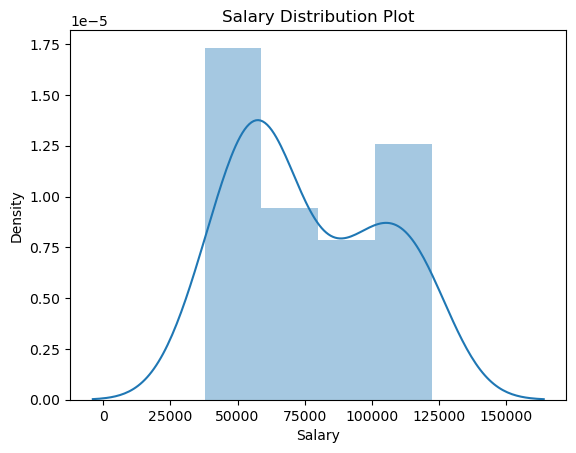

In [9]:
# Data distribution
plt.title('Salary Distribution Plot')
sns.distplot(df_sal['Salary'])
plt.show()

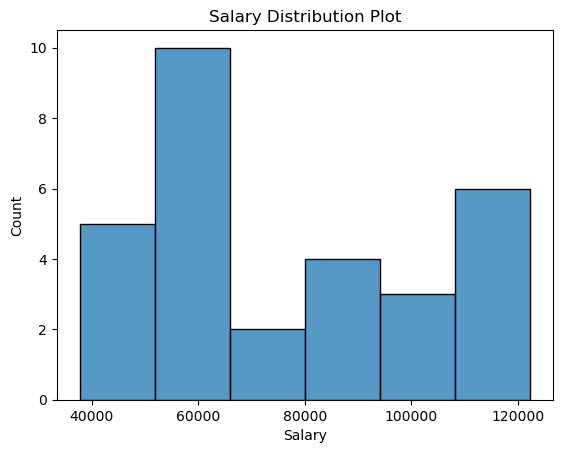

In [10]:
# Data distribution
plt.title('Salary Distribution Plot')
sns.histplot(df_sal['Salary'])
plt.show()

### Relationship between Salary and Experience


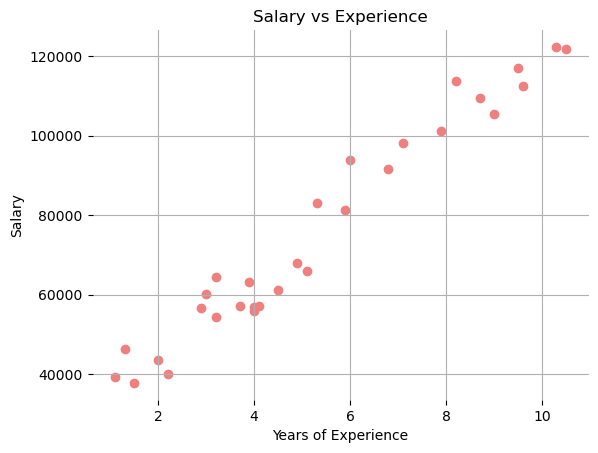

In [11]:
# Relationship between Salary and Experience
plt.scatter(df_sal['YearsExperience'], df_sal['Salary'], color = 'lightcoral')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.box(False)
plt.grid()
plt.show()

### Split data

##### Split into Independent/Dependent variables


In [15]:
# Splitting variables
X = df_sal.iloc[:, :1]  # independent
y = df_sal.iloc[:, 1:]  # dependent

In [16]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [17]:
print(y)

      Salary
0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
5    56642.0
6    60150.0
7    54445.0
8    64445.0
9    57189.0
10   63218.0
11   55794.0
12   56957.0
13   57081.0
14   61111.0
15   67938.0
16   66029.0
17   83088.0
18   81363.0
19   93940.0
20   91738.0
21   98273.0
22  101302.0
23  113812.0
24  109431.0
25  105582.0
26  116969.0
27  112635.0
28  122391.0
29  121872.0


In [18]:
X.shape

(30, 1)

#### Split into Train/Test sets


In [19]:
train_test_split(X, y, test_size = 0.2)

[    YearsExperience
 12              4.0
 17              5.3
 27              9.6
 15              4.9
 2               1.5
 16              5.1
 21              7.1
 0               1.1
 7               3.2
 10              3.9
 23              8.2
 4               2.2
 25              9.0
 18              5.9
 20              6.8
 28             10.3
 8               3.2
 3               2.0
 24              8.7
 29             10.5
 14              4.5
 19              6.0
 9               3.7
 5               2.9,
     YearsExperience
 13              4.1
 6               3.0
 1               1.3
 11              4.0
 26              9.5
 22              7.9,
       Salary
 12   56957.0
 17   83088.0
 27  112635.0
 15   67938.0
 2    37731.0
 16   66029.0
 21   98273.0
 0    39343.0
 7    54445.0
 10   63218.0
 23  113812.0
 4    39891.0
 25  105582.0
 18   81363.0
 20   91738.0
 28  122391.0
 8    64445.0
 3    43525.0
 24  109431.0
 29  121872.0
 14   61111.0
 19   93940.0
 9  

In [20]:
train_test_split(X, y, test_size = 0.2, random_state=40)

[    YearsExperience
 20              6.8
 3               2.0
 29             10.5
 21              7.1
 11              4.0
 4               2.2
 8               3.2
 17              5.3
 26              9.5
 22              7.9
 0               1.1
 9               3.7
 10              3.9
 23              8.2
 28             10.3
 12              4.0
 1               1.3
 18              5.9
 25              9.0
 24              8.7
 5               2.9
 7               3.2
 27              9.6
 6               3.0,
     YearsExperience
 2               1.5
 16              5.1
 19              6.0
 14              4.5
 15              4.9
 13              4.1,
       Salary
 20   91738.0
 3    43525.0
 29  121872.0
 21   98273.0
 11   55794.0
 4    39891.0
 8    64445.0
 17   83088.0
 26  116969.0
 22  101302.0
 0    39343.0
 9    57189.0
 10   63218.0
 23  113812.0
 28  122391.0
 12   56957.0
 1    46205.0
 18   81363.0
 25  105582.0
 24  109431.0
 5    56642.0
 7    54445.0
 27 

# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [32]:
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Predict Results


In [33]:
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

In [37]:
df_sal.sample(5)

,YearsExperience,Salary
12,4.0,56957.0
11,4.0,55794.0
29,10.5,121872.0
10,3.9,63218.0
26,9.5,116969.0


In [34]:
regressor.predict([[1.5]])

C:\Users\Raheel Mannan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[41434.13316677]])

In [39]:
regressor.predict([[10.5]])

C:\Users\Raheel Mannan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[124852.09037106]])

In [35]:
y_pred_test

array([[41434.13316677],
       [74801.31604849],
       [83143.11176892],
       [69240.11890153],
       [72947.58366617],
       [65532.6541369 ]])

In [26]:
y_pred_train

array([[ 90558.04129819],
       [ 46068.46412256],
       [124852.09037106],
       [ 93338.63987166],
       [ 64605.78794574],
       [ 47922.19650488],
       [ 57190.85841647],
       [ 76655.0484308 ],
       [115583.42845947],
       [100753.56940093],
       [ 37726.66840213],
       [ 61825.18937226],
       [ 63678.92175458],
       [103534.16797441],
       [122998.35798875],
       [ 64605.78794574],
       [ 39580.40078445],
       [ 82216.24557776],
       [110949.09750368],
       [108168.4989302 ],
       [ 54410.25984299],
       [ 57190.85841647],
       [116510.29465063],
       [ 55337.12603415]])

In [50]:
print(regressor.intercept_) # Intercept

[27531.14029939]


In [52]:
print(regressor.coef_) # Coefficient

[[9268.66191159]]


In [59]:
print('y = ', regressor.intercept_, '+', regressor.coef_, '* X')
print('y = ', regressor.coef_, '* X', '+', regressor.intercept_)

y =  [27531.14029939] + [[9268.66191159]] * X
y =  [[9268.66191159]] * X + [27531.14029939]


In [58]:
print('MSE = ', mean_squared_error(y_test, y_pred_test ))
print('R2 = ', r2_score(y_test, y_pred_test ))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred_test )))

MSE =  61641413.308879755
R2 =  0.7775083459037235
RMSE =  7851.2045769346605


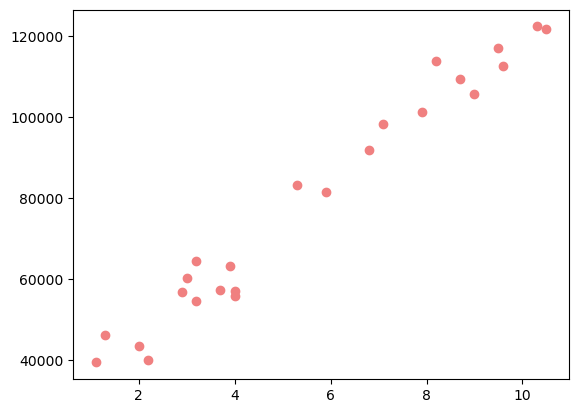

In [65]:
plt.scatter(X_train, y_train, color = 'lightcoral')

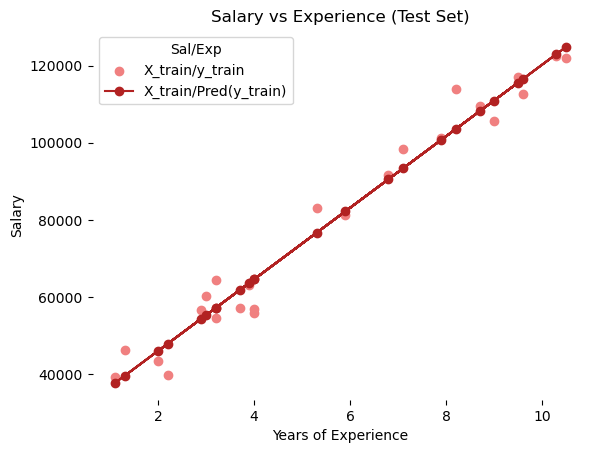

In [72]:
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.plot(X_train, y_pred_train, marker='o', color = 'firebrick')
plt.legend(['X_train/y_train', 'X_train/Pred(y_train)'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

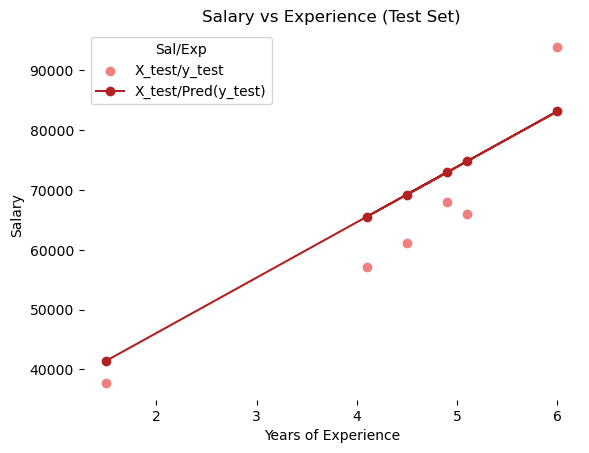

In [74]:
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.plot(X_test, y_pred_test, marker='o', color = 'firebrick')
plt.legend(['X_test/y_test', 'X_test/Pred(y_test)'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()